In [1]:
from collections import Counter

import numpy as np

import cv2
from imageio import imread
import matplotlib.pyplot as plt

In [2]:
dirname = 'stopsign/'
img_ref = imread(dirname + 'stop-reference.jpg')
img1 = imread(dirname + 'stop1.jpg')
img4 = imread(dirname + 'stop4.jpg')

In [3]:
def extract_correspondences(im1, im2, coeff=0.5):
    """
    im1: image to match
    im2: reference image
    return two lists of good-match keypoints
    """
    sift = cv2.xfeatures2d.SIFT_create()
    keypts1, desc1 = sift.detectAndCompute(im1, None)
    keypts2, desc2 = sift.detectAndCompute(im2, None)
    matches = cv2.BFMatcher().knnMatch(desc1, desc2, k=2)
    
    # find good matches above threshold
    good_keypts1 = []
    good_keypts2 = []
    for m1, m2 in matches:
        if m1.distance > coeff * m2.distance:
            continue
        good1 = keypts1[m1.queryIdx]
        good2 = keypts2[m1.trainIdx]
        good_keypts1.append(good1)
        good_keypts2.append(good2)
        
    return good_keypts1, good_keypts2

In [4]:
def get_vertices(im_ref):
    height, width = im_ref.shape[:2]
    points = np.stack([
        (0, 0), (width, 0), (width, height), (0, height)
    ]).astype(np.float32)
    return points

def reshape_vertices_for_cv2(points):
    vertices  = points.reshape((-1,1,2)).astype(np.int32)
    return vertices

def draw_bounding_box(im, vertices):
    ret = cv2.polylines(im.copy(), [vertices], isClosed=True, 
                   color=(0, 255, 255), thickness=5)
    return ret

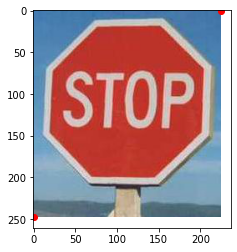

In [13]:
points_ref = get_vertices(img_ref)
plt.imshow(img_ref)
plt.plot(0, 248, 'ro')
plt.plot(225, 0, 'ro')

In [17]:
def rotate(point, degrees):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    return point @ R.T

In [21]:
corners = np.vstack([
    [0, 248], 
    [225., 0]
])

In [18]:
kpts, kpts_ref = extract_correspondences(img1, img_ref)

In [24]:
kp = kpts[10]
kp_ref = kpts_ref[10]

new_corners = kp.pt + (kp.size / kp_ref.size) * rotate(corners - kp_ref.pt, kp.angle - kp_ref.angle)

In [28]:
new_corners

array([[ 64.88402203, 269.54940252],
       [294.81547039,  10.43427657]])

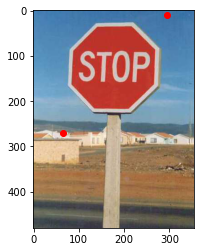

In [29]:
plt.imshow(img1)
plt.plot(64.88402203, 269.54940252, 'ro')
plt.plot(294.81547039,  10.43427657, 'ro')

In [34]:
img1rot = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
kpts, kpts_ref = extract_correspondences(img1rot, img_ref)
kp = kpts[10]
kp_ref = kpts_ref[10]
new_corners = kp.pt + (kp.size / kp_ref.size) * rotate(corners - kp_ref.pt, kp.angle - kp_ref.angle)

In [35]:
new_corners

array([[213.50936252,  64.18273235],
       [464.78033209, 289.65080754]])

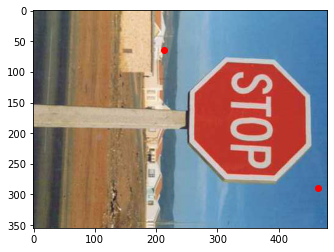

In [38]:
plt.imshow(img1rot)
plt.plot(*list(new_corners[0]), 'ro')
plt.plot(*list(new_corners[1]), 'ro')

In [44]:
kpts, kpts_ref = extract_correspondences(img4, img_ref)
kp = kpts[2]
kp_ref = kpts_ref[2]
new_corners = kp.pt + (kp.size / kp_ref.size) * rotate(corners - kp_ref.pt, kp.angle - kp_ref.angle)

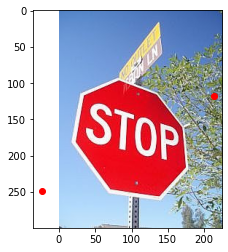

In [45]:
plt.imshow(img4)
plt.plot(*list(new_corners[0]), 'ro')
plt.plot(*list(new_corners[1]), 'ro')

In [14]:
def get_corners(kp, kp_ref, ur, ll):
    # ur, ll are the two original corners
    
    new_ur = kp.pt + (kp.scale / kp_ref.scale) * rotate(ur - kp_ref.pt, kp.angle - kp_ref.angle)
    new_ll = kp.pt + rotate(ll - )

In [16]:
ur = points_ref[1]
ll = points_ref[3]
ur, ll

(array([225.,   0.], dtype=float32), array([  0., 248.], dtype=float32))